## Sandbox for initial experimentation

In [6]:
from psd_tools import PSDImage
from PIL import Image
from dotenv import load_dotenv

import sys
sys.path.append('../src')

import cv2
import numpy as np
import matplotlib.pyplot as plt
import io
import glob
import utils.constant
import os

%matplotlib inline

In [7]:
load_dotenv()
f = os.getenv('TEST_FILE')

In [ ]:
psd = PSDImage.open(f)

#save individual layers
layers = {}

for layer in psd:
    print(layer)
    layer_name = layer.name
    print('Offset:',layer.offset)
    layer_im = layer.topil()
    layers[layer_name] = layer_im

In [13]:
aRPD = layers[constant.MASK]
im = layers[constant.ORIGINAL]
pen = layers[constant.PENETRATION]

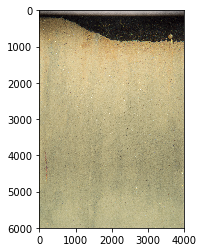

In [14]:
plt.imshow(np.asarray(im))

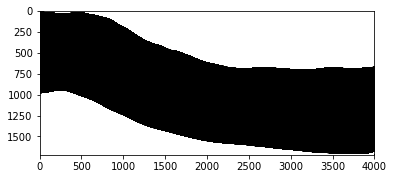

In [15]:
plt.imshow(np.asarray(aRPD))

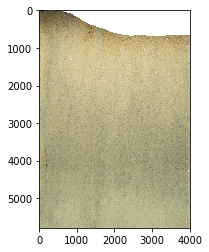

In [16]:
plt.imshow(np.asarray(pen))

In [118]:
gray=cv2.cvtColor(np.array(im),cv2.COLOR_RGB2GRAY)

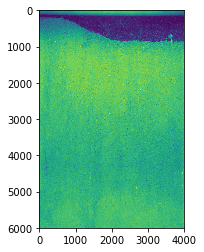

In [119]:
plt.imshow(gray)

In [137]:
im2=gray.copy()
im3=gray.copy()

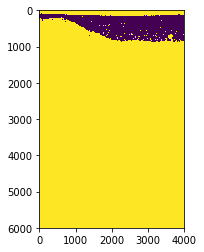

In [121]:
ret, thresh = cv2.threshold(im2,60,255,cv2.THRESH_BINARY)
plt.imshow(thresh)

In [141]:
_, contours, hierarchy=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_TC89_L1)

In [142]:
cv2.drawContours(im2,contours,-1,(255,0,0),3)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

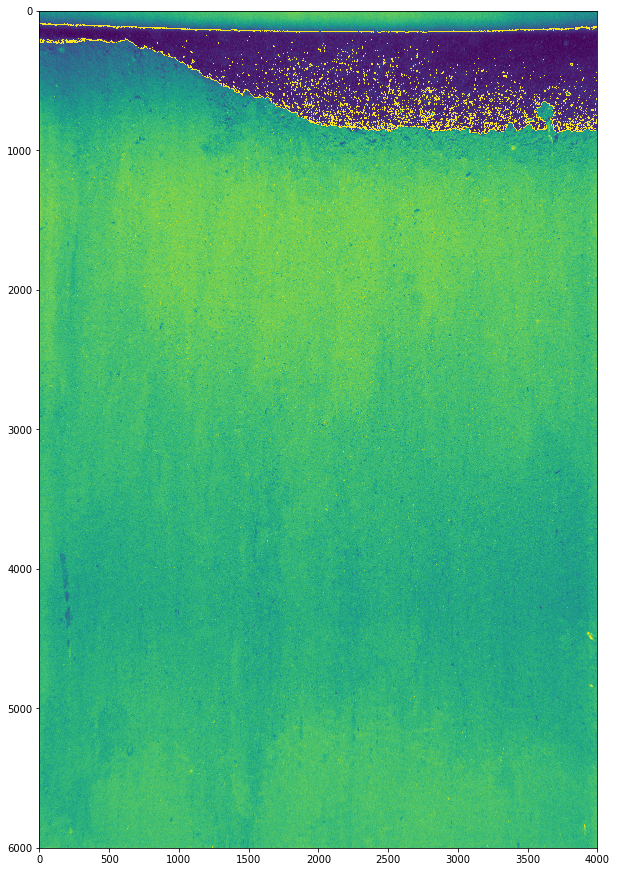

In [143]:

plt.figure(figsize=(10,20))

plt.imshow(im2)

In [146]:
contours[0]

array([[[3202,  884]]], dtype=int32)

In [152]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
 
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
 
    # return the edged image
    return edged

In [165]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
 
# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 0, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)

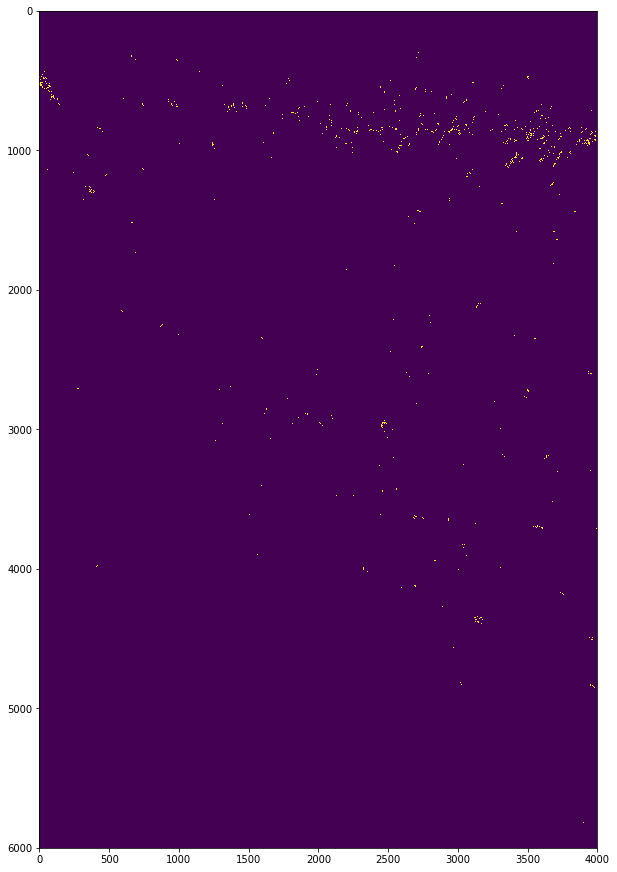

In [166]:
plt.figure(figsize=(10,20))
plt.imshow(wide)